<a href="https://colab.research.google.com/github/marianadc01/greends-pml-assignments/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mariana Dias Coelho (25605)

Curricular Unit - Practical Machine Learning

MSc in Green Data Science

**Assignment 9**

3 minute video + upload to Moodle

What to do:
  - Consider the wine quality data set, where the response variable is quality and both red and white wines are included in the data set;
  - The goal is to predict the quality from the explanatory variables;
  - You can/should preprocess the data and perform feature engineering;
  - The goal is to develop a classifier with overall accuracy over the test set larger than ~90%~ 55% for the problem;
  - You should exhibit and discuss the confusion matrix over the test set;
  - You should also show and discuss a plot that shows how the overal accuracy varies with some parameter like max_depth, max_leaf_nodes or another parameter designed to avoid overfitting.

**Wine quality dataset:** https://archive.ics.uci.edu/dataset/186/wine+quality

**Original pieces of code from ML_overview_with_examples:**

In [ ]:
#@title Script to apply dimensionality reduction techniques t-SNE, UMAP and LDA to several data sets
!pip install umap-learn[plot]
!pip install ucimlrepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Data
from sklearn.datasets import load_digits, load_wine
from ucimlrepo import fetch_ucirepo
# plotly
import plotly.express as px
import matplotlib.pyplot as plt

# constants
DATA='wine quality' # 'digits', 'wine', 'wine quality'
WINE_QUALITY_RESPONSE='quality' # 'color' or 'quality' for 'wine quality'
STANDARDIZE=True
K=3 # new data dimension
SHOW_DIGITS=False # for 'digits'
METHOD='umap' #'lda' #'umap' // 'tsne'

# read data; returns X, y (dataframes) and labels (list with the length of y)
if DATA=='digits':
    digits = load_digits(as_frame=True)
    if SHOW_DIGITS:
        fig, ax = plt.subplots(1, 4)
        for i in range(4):
            ax[i].imshow(digits.images[i], cmap='Greys')
        # plt.savefig('figures/05_12.png', dpi=300)
        plt.show()
    y = digits.target # dataframe
    X = digits.data # dataframe
    labels=['digit_'+str(i) for i in y]

if DATA=='wine':
    X, y = load_wine(return_X_y=True, as_frame=True)
    labels=['region'+str(i) for i in y]

if DATA=='wine quality':
    # URL of the white wine dataset
    URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
    # load the dataset from the URL
    white_df = pd.read_csv(URL, sep=";")
    # fill the 'color' column
    white_df["color"] = 'white'
    # keep only the first of duplicate items
    white_df = white_df.drop_duplicates(keep='first')
    # URL of the red wine dataset
    URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
    # load the dataset from the URL
    red_df = pd.read_csv(URL, sep=";")
    # fill the `color` column
    red_df["color"] = 'red'
    # keep only the first of duplicate items
    red_df = red_df.drop_duplicates(keep='first')
    # concatenate to obtain full data set
    df = pd.concat([red_df, white_df], ignore_index=True)
    # define X and y (dataframe)
    X = df.drop(columns=['quality','color'])
    if WINE_QUALITY_RESPONSE=='quality':
        y=df[WINE_QUALITY_RESPONSE] # pandas.core.series.Series
        labels=['quality_'+str(i) for i in y]
    if WINE_QUALITY_RESPONSE=='color':
        y = pd.get_dummies(df[WINE_QUALITY_RESPONSE])['red'].replace({True: 1, False: 0}) # pandas.core.series.Series
        labels=['color_'+str(i) for i in y]

# standardize data
if STANDARDIZE:
    stdsc = StandardScaler().set_output(transform="pandas")
    X = stdsc.fit_transform(X)

# dimensionality reduction
if METHOD=='tsne':
    #In t-SNE, the perplexity may be viewed as a knob that sets the number of effective nearest neighbors. Typically, between 5 and 50. Robust
    tsne = TSNE(n_components=K)#, metric='mahalanobis')
    X_ = tsne.fit_transform(X) # dataframe with K columns
if METHOD=='umap':
    umap=UMAP(n_components=K,n_neighbors=3,min_dist=0.1)
    print(y,type(y))
    X_= umap.fit_transform(X,y) # or just umap.fit_transform(X)
if METHOD=='lda':
    K=min(len(np.unique(labels))-1,K); print('K',K)
    lda = LinearDiscriminantAnalysis(n_components=K)
    X_ = lda.fit_transform(X, y)

# prepare dataframe for plot with plotly.express
proj_names=['proj'+str(i) for i in range(X_.shape[1])]
df=pd.DataFrame(X_,columns=proj_names) # projections of X
df['label']=labels # label

# plots 2D or 3D
def plot_projection_2D(df):
    fig = px.scatter(df, x=proj_names[0], y=proj_names[1],color='label', title='dimension reduction with '+METHOD)
    fig.show()

def plot_projection_3D(df):
    fig = px.scatter_3d(df, x=proj_names[0], y=proj_names[1], z=proj_names[2],color='label', title='dimension reduction with '+METHOD)
    fig.show()

if K==2:
    plot_projection_2D(df)
if K==3:
    plot_projection_3D(df)

0       5
1       5
2       5
3       6
4       5
       ..
5315    6
5316    5
5317    6
5318    7
5319    6
Name: quality, Length: 5320, dtype: int64 <class 'pandas.core.series.Series'>


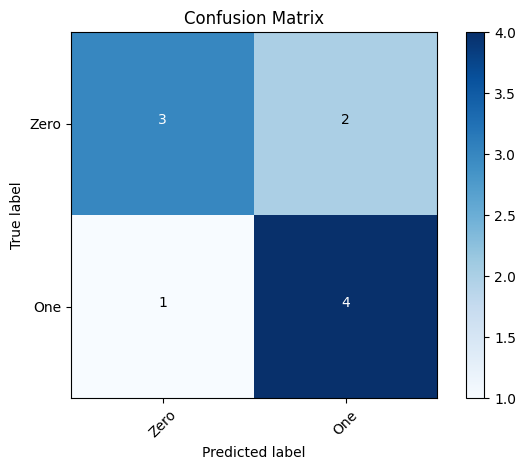

In [ ]:
#@title Script that computes a confusion metrics from lists of predicted and actual labels
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt # to plot
# Actual labels
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])
# Predicted labels
y_pred = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Define class labels
classes = ['Zero', 'One']
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
# Fill in confusion matrix with values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# load the iris dataset
dataset = load_wine() #

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9444444444444444


**Code for the assignment:**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Overall accuracy: 0.50


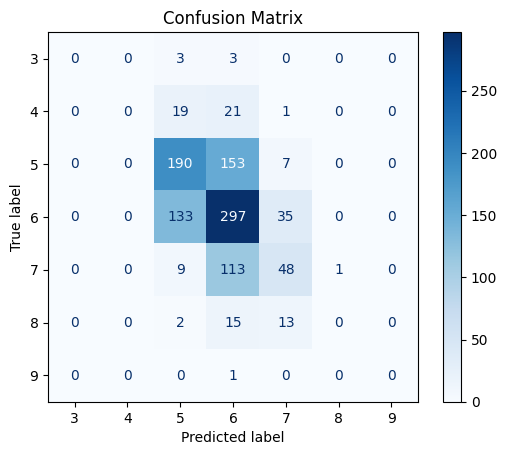

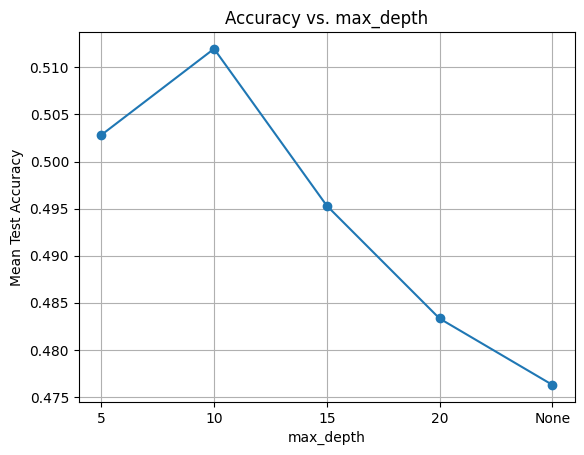

In [2]:
!pip install umap-learn[plot]
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import umap

# Load the wine quality dataset
white_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
white_df["color"] = 'white'
white_df = white_df.drop_duplicates(keep='first')
red_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
red_df["color"] = 'red'
red_df = red_df.drop_duplicates(keep='first')
wine_data = pd.concat([red_df, white_df], ignore_index=True)

# Encode 'color' as a binary variable
wine_data['color'] = wine_data['color'].map({'red': 0, 'white': 1})

# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce dimensionality with UMAP
umap_reducer = umap.UMAP(random_state=42)
X_train_umap = umap_reducer.fit_transform(X_train_scaled)
X_test_umap = umap_reducer.transform(X_test_scaled)

# Model development
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [5, 10, 15, 20, None]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_umap, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test_umap)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Overall accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy vs. max_depth
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Handling the None value in max_depth for plotting purposes
depths = [d if d is not None else 'None' for d in param_grid['max_depth']]

plt.plot(depths, mean_test_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. max_depth')
plt.grid(True)
plt.show()

1. Data Loading and Preprocessing:
  - Load Data: The code fetches two wine quality datasets (red and white wines) from an online repository.
  - Combine Data: It combines the red and white wine datasets into a single DataFrame and adds a color column indicating the type of wine.
  - Encode color: The color column is encoded into a binary variable (0 for red and 1 for white).
  - Feature and Target Separation: Features (X) are separated from the target variable (y), which is the wine quality.

2. Train-Test Split and Scaling:
  - Split Data: The data is split into training and testing sets using an 80-20 split ratio.
  - Standardize Features: The feature values are standardized using StandardScaler to ensure that they have a mean of 0 and a standard deviation of 1.

3. Dimensionality Reduction with UMAP:
  - Apply UMAP: UMAP (Uniform Manifold Approximation and Projection) is used to reduce the dimensionality of the feature space, making the data easier to process for the classifier.

4. Model Development and Hyperparameter Tuning:
  - Random Forest Classifier: A Random Forest classifier is instantiated.
  - Grid Search for Hyperparameter Tuning: GridSearchCV is used to find the best max_depth for the Random Forest. It tests different depths (5, 10, 15, 20, and None) to find the one that gives the highest accuracy using cross-validation.

5. Model Evaluation:
  - Best Model: The best Random Forest model from the grid search is selected.
  - Predictions: Predictions are made on the test set.
  - Accuracy: The accuracy of the predictions is calculated and printed.
  - Confusion Matrix: A confusion matrix is displayed to show the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

6. Plotting Accuracy vs. max_depth:
  - Accuracy Plot: A plot is generated to show how the accuracy changes with different values of max_depth, helping to visualize the effect of this parameter on model performance.